In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#magic function for diplaying plot in the notebook
%matplotlib inline

In [2]:
# read the excel Dataset file
df=pd.read_excel("cleaned_data_new.xlsx")
#df.head() # Display the first five rows
df.head()

,Model,Year,Fuel_Type,Transmission,Owners,Insurance,Price,Condition,Safety,Warranty,Cylinder_Numbers,Estimated_Mileage,TAge,carlength,carwidth,Weight,engine_size_cc,warrenty remaining
0,Toyota Corolla,2019,Electric,Manual,1,No,25385.241860,Excellent,5 stars,20,two,10736.91127,1,182.1,60.0,3543.006290,2696.625886,15
1,Toyota Corolla,2020,Electric,Manual,1,Collision,24381.083350,Good,3 stars,8,three,12446.97569,1,169.7,65.2,3340.060049,2044.309359,4
2,Toyota Tundra,2017,Hybrid,Automatic,1,Comprehensive,28357.830640,Good,5 stars,35,five,10560.54904,1,176.0,68.1,3847.825597,2586.011338,28
3,Ford Fusion,2010,Hybrid,Automatic,1,Comprehensive,20165.480380,Fair,4 stars,18,five,19054.26593,1,188.7,70.3,3365.398982,2378.832784,4
4,Honda CR-V,2006,Petrol,Manual,4,No,5993.991374,Fair,1 star,18,three,44169.76022,2,156.1,71.4,3384.373776,1986.830155,0


In [3]:
df.shape

(1612, 18)

Text(0.5, 1.0, 'Distribution of Car Price')

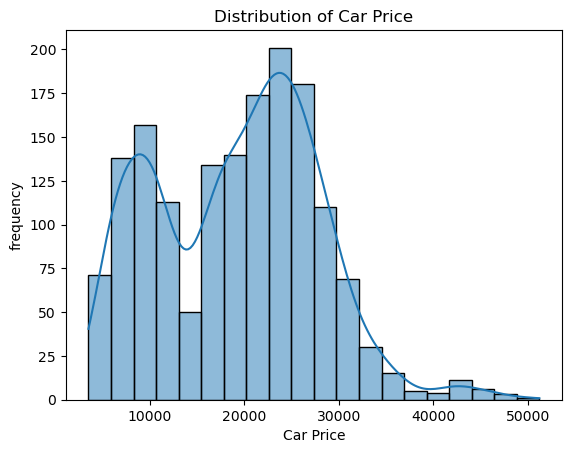

In [4]:
'''plotting the distribution of car price using Seaborn '''

sns.histplot(df['Price'], bins=20, kde=True)
# add x/y labels
plt.xlabel("Car Price") 
plt.ylabel("frequency")
# add title
plt.title("Distribution of Car Price")

Text(0.5, 1.0, 'Distribution of Estimated Mileage of the car')

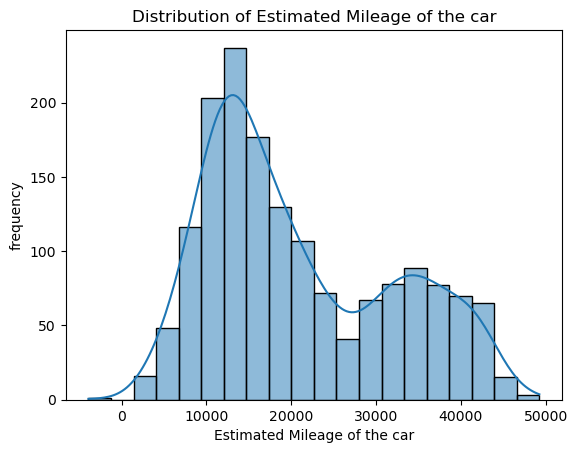

In [5]:
'''plotting the distribution of Estimated Mileage of the car using Seaborn '''

sns.histplot(df['Estimated_Mileage'], bins=20, kde=True)
# add x/y labels
plt.xlabel("Estimated Mileage of the car") 
plt.ylabel("frequency")
# add title
plt.title("Distribution of Estimated Mileage of the car")

<Axes: >

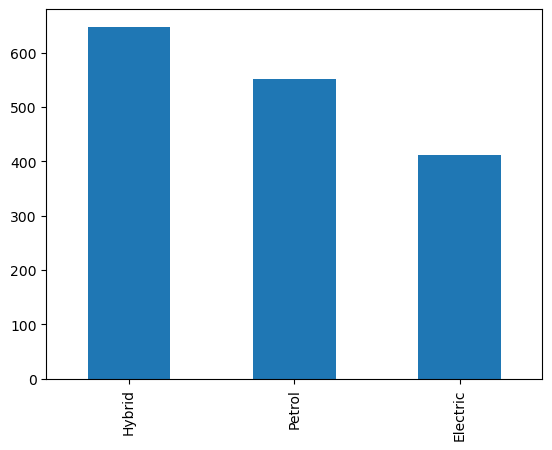

In [6]:
df['Fuel_Type'].value_counts().plot.bar()

<Axes: >

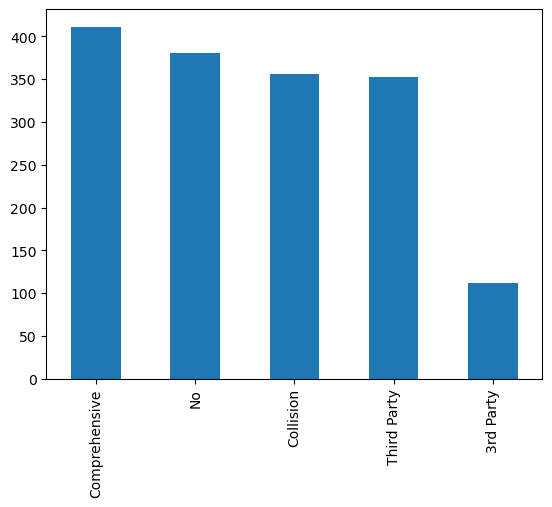

In [7]:
df['Insurance'].value_counts().plot.bar()

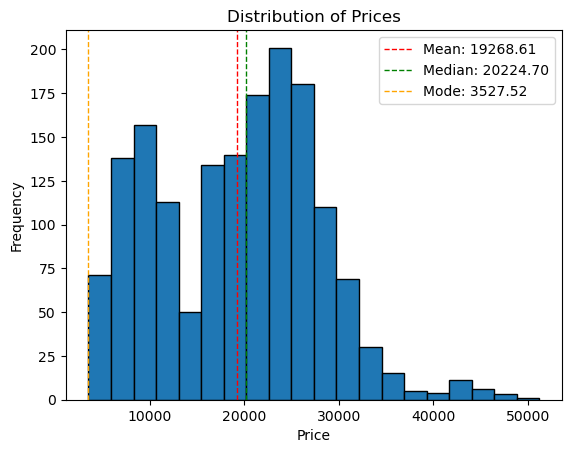

Mean Price: 19268.61
Median Price: 20224.70
Mode Price: 3527.52
Range of Price: 47691.70
Standard Deviation of Price: 8567.64
Variance of Price: 73404389.84


In [8]:

# Extracting Price data
prices = df['Price']

# Measures of centrality
mean_price = np.mean(prices)
median_price = np.median(prices)
mode_price = df['Price'].mode()[0]

# Measures of spread
range_price = np.ptp(prices)
std_dev_price = np.std(prices)
variance_price = np.var(prices)

# Plotting histogram
plt.hist(prices, bins=20, edgecolor='black')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_price:.2f}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.legend()
plt.show()

# Printing measures of centrality and spread
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price:.2f}")
print(f"Range of Price: {range_price:.2f}")
print(f"Standard Deviation of Price: {std_dev_price:.2f}")
print(f"Variance of Price: {variance_price:.2f}")


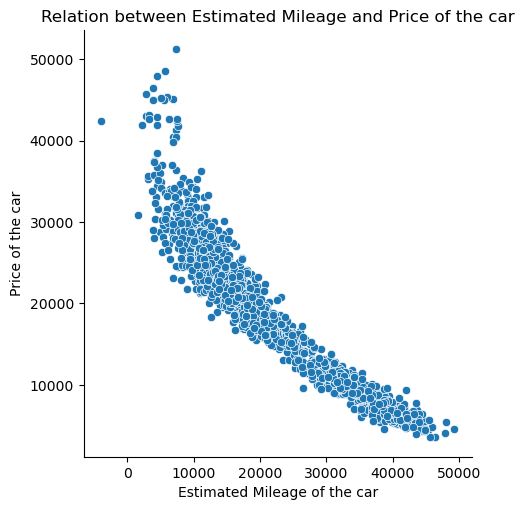

In [9]:
ax=sns.relplot(x='Estimated_Mileage',y='Price',data=df)
# add x/y labels
ax.set(xlabel='Estimated Mileage of the car',
       ylabel='Price of the car', 
       title='Relation between Estimated Mileage and Price of the car')

<Axes: xlabel='Fuel_Type', ylabel='Estimated_Mileage'>

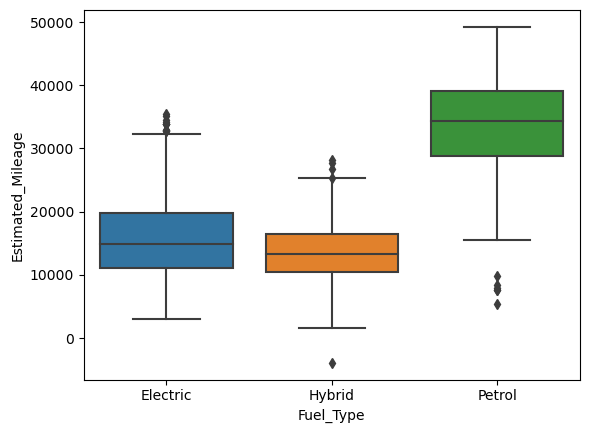

In [10]:
sns.boxplot(data=df, x="Fuel_Type", y="Estimated_Mileage")

<Axes: xlabel='Transmission', ylabel='Estimated_Mileage'>

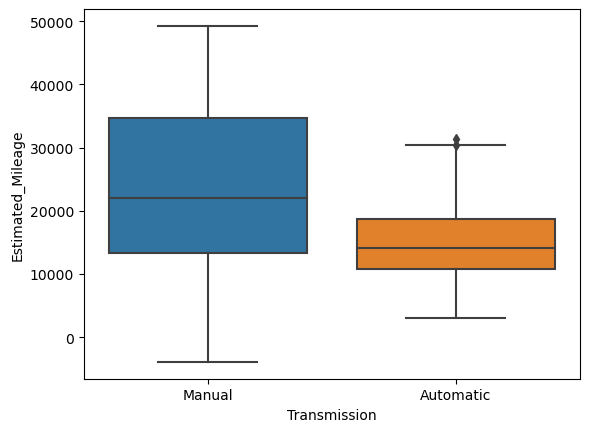

In [11]:
sns.boxplot(data=df, x="Transmission", y="Estimated_Mileage")

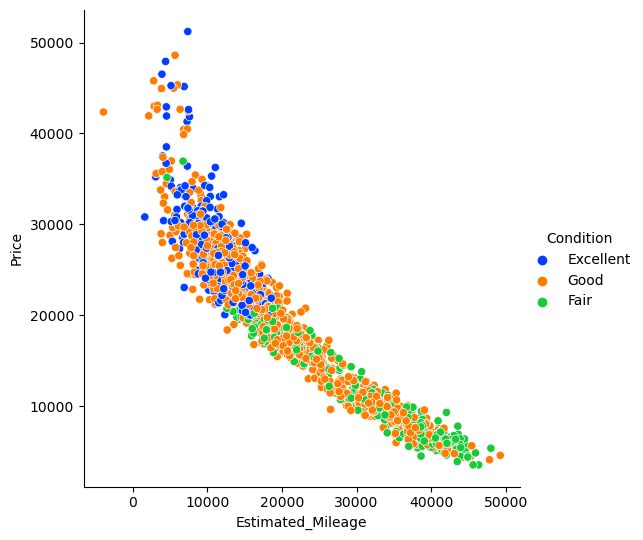

In [12]:
ax=sns.relplot(x='Estimated_Mileage',y='Price', height=5.5, hue='Condition', palette="bright", data=df)
ax.set(xlabel='Estimated_Mileage', ylabel='Price')

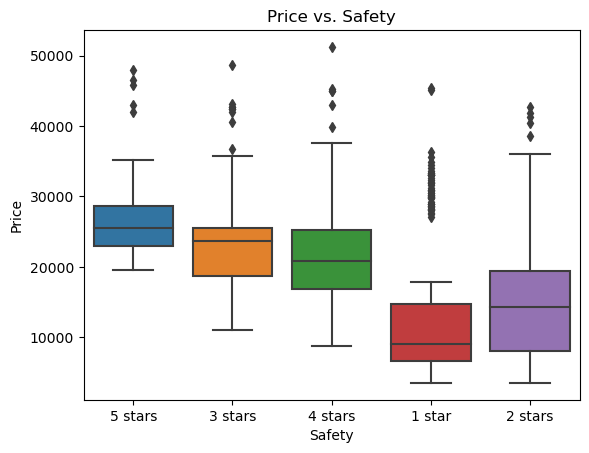

In [13]:
# Box plot of Price vs. Safety
sns.boxplot(x='Safety', y='Price', data=df)
plt.xlabel('Safety')
plt.ylabel('Price')
plt.title('Price vs. Safety')
plt.show()


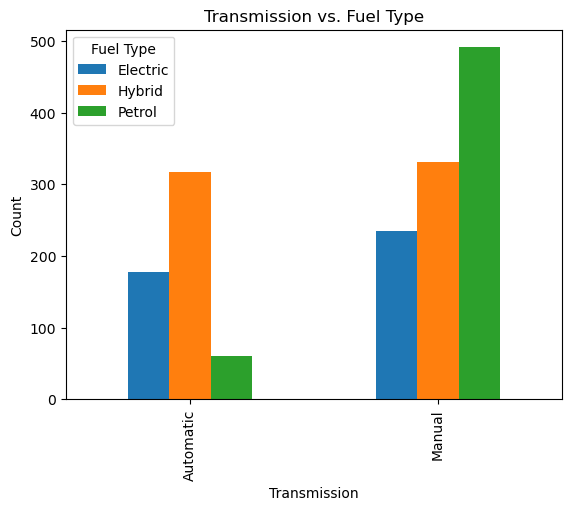

In [14]:
# Create a cross-tabulation between Transmission and Fuel Type
cross_tab = pd.crosstab(df['Transmission'], df['Fuel_Type'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Transmission vs. Fuel Type')
plt.legend(title='Fuel Type')
plt.show()



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [16]:
# Convert categorical variables into dummy/indicator variables using one-hot encoding
df = pd.get_dummies(df, columns=["Fuel_Type", "Transmission", "Insurance", "Condition", "Safety"])

# Drop the 'Model' column as it's not needed for prediction
df = df.drop(columns=["Model","Cylinder_Numbers"])

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=["Price"])
y = df["Price"]


In [17]:
#X

In [18]:
#y

In [19]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = LinearRegression()


In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1762.4748013211017


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5330352.563793353


In [24]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) score:", r2)

R-squared (R²) score: 0.9194777138460416


In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2308.755631025803


In [26]:
from sklearn.tree import DecisionTreeRegressor
# Initialize decision tree regression model
model = DecisionTreeRegressor(random_state=42)

In [27]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [29]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2063.303819092879


In [30]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 10448777.337312046


In [31]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) score:", r2)

R-squared (R²) score: 0.842156887627095


In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 3232.4568577650107


In [33]:

from sklearn.ensemble import RandomForestRegressor
# Initialize random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) score:", r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error (MAE): 1407.61234092161
Mean Squared Error (MSE): 4443396.440601763
R-squared (R²) score: 0.9328764025636999
Root Mean Squared Error: 2107.9365361893047


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM regressor
svr = SVR(kernel='linear')

# Train the model
svr.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svr.predict(X_test_scaled)

# Calculate evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) score:", r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error (MAE): 3542.896065313448
Mean Squared Error (MSE): 20700117.917167246
R-squared (R²) score: 0.6872963282637672
Root Mean Squared Error: 4549.738225125402


In [35]:
df

,Year,Owners,Price,Warranty,Estimated_Mileage,TAge,carlength,carwidth,Weight,engine_size_cc,...,Insurance_No,Insurance_Third Party,Condition_Excellent,Condition_Fair,Condition_Good,Safety_1 star,Safety_2 stars,Safety_3 stars,Safety_4 stars,Safety_5 stars
0,2019,1,25385.241860,20,10736.911270,1,182.1,60.0,3543.006290,2696.625886,...,1,0,1,0,0,0,0,0,0,1
1,2020,1,24381.083350,8,12446.975690,1,169.7,65.2,3340.060049,2044.309359,...,0,0,0,0,1,0,0,1,0,0
2,2017,1,28357.830640,35,10560.549040,1,176.0,68.1,3847.825597,2586.011338,...,0,0,0,0,1,0,0,0,0,1
3,2010,1,20165.480380,18,19054.265930,1,188.7,70.3,3365.398982,2378.832784,...,0,0,0,1,0,0,0,0,1,0
4,2006,4,5993.991374,18,44169.760220,2,156.1,71.4,3384.373776,1986.830155,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,2009,1,27432.761260,20,7815.501538,3,178.4,61.0,3970.307055,2490.927676,...,1,0,0,0,1,0,0,0,1,0
1608,2001,2,7623.975722,10,37877.871920,5,157.9,63.0,3565.295621,2181.474184,...,0,0,0,0,1,1,0,0,0,0
1609,2013,4,15164.228470,11,24612.103170,4,194.4,71.1,4157.519949,2238.645129,...,0,0,0,0,1,0,1,0,0,0
1610,2012,1,21614.535620,30,15609.828720,2,146.5,66.9,3503.415954,2355.597609,...,0,1,1,0,0,0,0,0,1,0


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



# Feature engineering
df['Age'] = 2024 - df['Year']  # Calculate the age of the car
#df['Warranty_Percentage_Remaining'] = df['warrenty remaining'] / df['Warranty']  # Calculate percentage of warranty remaining
df['Interaction_Age_Mileage'] = df['Age'] * df['Estimated_Mileage']  # Interaction term between age and mileage
df['Log_Weight'] = np.log(df['Weight'])  # Log transformation of Weight
#df['Car_Class'] = pd.cut(df['carlength'] * df['carwidth'], bins=3, labels=['Compact', 'Mid-size', 'Full-size'])  # Create car class based on dimensions

# Split the dataset into features (X) and target variable (y)
A= df.drop(columns=["Price"])
B= df["Price"]



In [37]:
A

,Year,Owners,Warranty,Estimated_Mileage,TAge,carlength,carwidth,Weight,engine_size_cc,warrenty remaining,...,Condition_Fair,Condition_Good,Safety_1 star,Safety_2 stars,Safety_3 stars,Safety_4 stars,Safety_5 stars,Age,Interaction_Age_Mileage,Log_Weight
0,2019,1,20,10736.911270,1,182.1,60.0,3543.006290,2696.625886,15,...,0,0,0,0,0,0,1,5,53684.55635,8.172731
1,2020,1,8,12446.975690,1,169.7,65.2,3340.060049,2044.309359,4,...,0,1,0,0,1,0,0,4,49787.90276,8.113744
2,2017,1,35,10560.549040,1,176.0,68.1,3847.825597,2586.011338,28,...,0,1,0,0,0,0,1,7,73923.84328,8.255263
3,2010,1,18,19054.265930,1,188.7,70.3,3365.398982,2378.832784,4,...,1,0,0,0,0,1,0,14,266759.72302,8.121302
4,2006,4,18,44169.760220,2,156.1,71.4,3384.373776,1986.830155,0,...,1,0,1,0,0,0,0,18,795055.68396,8.126924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,2009,1,20,7815.501538,3,178.4,61.0,3970.307055,2490.927676,5,...,0,1,0,0,0,1,0,15,117232.52307,8.286599
1608,2001,2,10,37877.871920,5,157.9,63.0,3565.295621,2181.474184,0,...,0,1,1,0,0,0,0,23,871191.05416,8.179002
1609,2013,4,11,24612.103170,4,194.4,71.1,4157.519949,2238.645129,0,...,0,1,0,1,0,0,0,11,270733.13487,8.332674
1610,2012,1,30,15609.828720,2,146.5,66.9,3503.415954,2355.597609,18,...,0,0,0,0,0,1,0,12,187317.94464,8.161494


In [47]:
B

0       25385.241860
1       24381.083350
2       28357.830640
3       20165.480380
4        5993.991374
            ...     
1607    27432.761260
1608     7623.975722
1609    15164.228470
1610    21614.535620
1611     8373.305539
Name: Price, Length: 1612, dtype: float64

In [48]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical and categorical features
numeric_features = ['Estimated_Mileage','carlength', 'carwidth', 'Weight', 
                    'engine_size_cc', 'warrenty remaining', 
                    'Interaction_Age_Mileage']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])




In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])



In [50]:
# Append estimator to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])



In [51]:
# Fit the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Estimated_Mileage',
                                                   'carlength', 'carwidth',
                                                   'Weight', 'engine_size_cc',
                                                   'warrenty remaining',
                                                   'Interaction_Age_Mileage'])])),
                ('regressor', RandomForestRegressor())])

In [52]:

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1768.8785156790707


In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2510.2866172627373


In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) score:", r2)

Mean Squared Error (MSE): 6301538.900808398
R-squared (R²) score: 0.9048066122252723
